<a href="https://colab.research.google.com/github/cesarSales/Edutech-datascience-Segunda-23400431/blob/main/notebook/pandas_io.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
pessoasf = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [7]:
pessoasm = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [8]:
print('quantidades de nomes: '+str(len(pessoasf + pessoasm)))

quantidades de nomes: 200


In [9]:
frames = [pessoasf ,pessoasm]

In [10]:
nomes = pd.concat(frames)['nome'].to_frame()

In [11]:
nomes.sample(5)

,nome
113,ROBERTA
43,TEREZINHA
15,BRUNO
120,JOSIANE
59,ISABEL


## id alunos

In [12]:
total_alunos = len(nomes)

In [13]:
import numpy as np 
np.random.seed(123)

In [14]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1

In [15]:
dominios = ['@dominiodoemail.co.br','@serviçodo email.com.br']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [16]:
nomes.sample(5)

,nome,id_aluno,dominio
46,FABIANA,358,@serviçodo email.com.br
38,DIEGO,294,@dominiodoemail.co.br
136,NILTON,271,@dominiodoemail.co.br
119,MOISES,4,@serviçodo email.com.br
101,GISELE,298,@serviçodo email.com.br


In [17]:
nomes['email']= nomes.nome.str.cat(nomes.dominio).str.lower()

In [18]:
nomes.sample(5)

,nome,id_aluno,dominio,email
42,MARLENE,268,@serviçodo email.com.br,marlene@serviçodo email.com.br
76,TATIANE,203,@serviçodo email.com.br,tatiane@serviçodo email.com.br
65,MAURICIO,395,@serviçodo email.com.br,mauricio@serviçodo email.com.br
52,SAMUEL,220,@dominiodoemail.co.br,samuel@dominiodoemail.co.br
187,ELTON,97,@dominiodoemail.co.br,elton@dominiodoemail.co.br


criando cursos

In [19]:
!pip3 install html5lib
!pip3 install lxml

In [20]:
import html5lib 

In [21]:
url     = 'http://tabela-cursos.herokuapp.com/index.html'
cursos  = pd.read_html(url)

In [22]:
cursos = cursos[0]

In [23]:
cursos = cursos.rename(columns= {'Nome do curso' : 'nome_do_curso'})

In [24]:
cursos['id'] = cursos.index + 1

In [25]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [26]:
cursos = cursos.set_index('id')

In [27]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [28]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)* 1.5).astype(int)

In [29]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@serviçodo email.com.br,clara@serviçodo email.com.br,3
64,ROBSON,290,@serviçodo email.com.br,robson@serviçodo email.com.br,2
13,DANIEL,195,@serviçodo email.com.br,daniel@serviçodo email.com.br,4
98,GILSON,134,@dominiodoemail.co.br,gilson@dominiodoemail.co.br,1
33,NATALIA,192,@dominiodoemail.co.br,natalia@dominiodoemail.co.br,1


In [30]:
nomes.matriculas.describe()

count    400.000000
mean       2.017500
std        1.422058
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


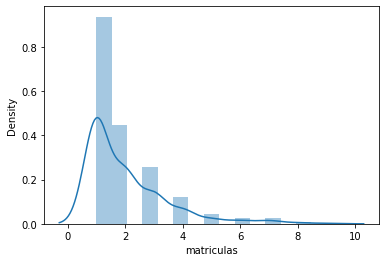

In [31]:
import seaborn as sns
sns.distplot(nomes.matriculas)

In [32]:
nomes.matriculas.value_counts()

1    200
2     95
3     55
4     26
5      9
7      6
6      6
8      2
9      1
Name: matriculas, dtype: int64

In [33]:
nomes.sample(2)

,nome,id_aluno,dominio,email,matriculas
23,FERNANDO,321,@dominiodoemail.co.br,fernando@dominiodoemail.co.br,2
169,JOELMA,394,@dominiodoemail.co.br,joelma@dominiodoemail.co.br,1


In [34]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [35]:
for index , row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas 
  for i in range(matriculas):
    mat = [id , np.random.choice(cursos.index , p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas , columns =[ 'id_aluno', 'id_curso'])

In [36]:
matriculas.head(5)

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,304,18
4,156,17


In [37]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns ={ 'id_aluno': 'quantidade_de_alunos'})

In [38]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
31,JOSEFA,103,@serviçodo email.com.br,josefa@serviçodo email.com.br,3
172,WANDERSON,312,@serviçodo email.com.br,wanderson@serviçodo email.com.br,1
37,ROSANGELA,333,@dominiodoemail.co.br,rosangela@dominiodoemail.co.br,2


In [39]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [40]:
matriculas.head()

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,304,18
4,156,17


In [41]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,8,Java para Web
3,22,C# para Web
4,22,Ruby on Rails
5,19,Cursos de Python
6,65,PHP com MySql
7,62,.NET para web
8,47,Novas integrações com Java
9,48,TDD com Java


exportando csv

In [42]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False, sep=';')

In [43]:
matriculas_json = matriculas_por_curso.to_json()

In [44]:
matriculas_html = matriculas_por_curso.to_html()

In [45]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>3</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>8</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>22</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>22</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>19</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>65</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>62</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>47</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>48</td>
  

banco de dados sql

In [46]:
!pip install sqlalchemy

In [47]:
from sqlalchemy import create_engine , MetaData,Table

In [48]:
engine = create_engine('sqlite:///:memory:')

In [49]:
engine

Engine(sqlite:///:memory:)

In [50]:
type(engine)

sqlalchemy.engine.base.Engine

In [51]:
matriculas_por_curso.to_sql('matriculas',engine)

In [52]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


query sql

In [53]:
query = 'select * from matriculas where quantidade_de_alunos <20'

In [54]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,3,Lógica de programação
1,2,8,Java para Web
2,5,19,Cursos de Python
3,11,18,Preparatório para certificação Java
4,17,8,Internet das coisas
5,19,14,Boas práticas em Java


In [55]:
muitas_matriculas = pd.read_sql_table('matriculas',engine,columns = ['nome_do_curso','quantidade_de_alunos'])

In [56]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [57]:
muitas_matriculas.to_sql('muintas_matriculas',con = engine)

In [58]:
print(engine.table_names())

['matriculas', 'muintas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


nomes alunas da proxima turma



In [59]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,8,Java para Web
3,22,C# para Web
4,22,Ruby on Rails
5,19,Cursos de Python
6,65,PHP com MySql
7,62,.NET para web
8,47,Novas integrações com Java
9,48,TDD com Java


In [60]:
matriculas

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,304,18
4,156,17
...,...,...
802,383,16
803,383,6
804,366,20
805,366,13


In [61]:
id_curso = 20

In [63]:
proxima = matriculas.query("id_curso== {}".format(id_curso))

In [64]:
proxima

,id_aluno,id_curso
14,288,20
46,200,20
91,268,20
119,276,20
141,278,20
203,211,20
204,211,20
231,161,20
338,105,20
340,62,20


In [66]:
proxima.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
44,20,NICOLAS,@serviçodo email.com.br,nicolas@serviçodo email.com.br,6
61,20,DIOGO,@serviçodo email.com.br,diogo@serviçodo email.com.br,8
62,20,EUNICE,@dominiodoemail.co.br,eunice@dominiodoemail.co.br,1
105,20,MARISA,@serviçodo email.com.br,marisa@serviçodo email.com.br,2
123,20,EDSON,@dominiodoemail.co.br,edson@dominiodoemail.co.br,3
125,20,LUIS,@serviçodo email.com.br,luis@serviçodo email.com.br,1
139,20,SERGIO,@serviçodo email.com.br,sergio@serviçodo email.com.br,2
161,20,TATIANA,@dominiodoemail.co.br,tatiana@dominiodoemail.co.br,3
165,20,REBECA,@dominiodoemail.co.br,rebeca@dominiodoemail.co.br,2


In [72]:
proxima.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

(id_aluno
 44      NICOLAS
 61        DIOGO
 62       EUNICE
 105      MARISA
 123       EDSON
 125        LUIS
 139      SERGIO
 161     TATIANA
 165      REBECA
 198      CICERO
 200    GABRIELA
 211       TANIA
 211       TANIA
 226    VALDECIR
 257     ADILSON
 268     MARLENE
 276       LUZIA
 278     SILVANA
 288    FERNANDA
 351     EMANUEL
 356     RONALDO
 366     GEOVANE
 Name: nome, dtype: object, ['id_curso'])

In [73]:
proxima.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
44,NICOLAS
61,DIOGO
62,EUNICE
105,MARISA
123,EDSON
125,LUIS
139,SERGIO
161,TATIANA
165,REBECA


In [75]:
nome_cuso = cursos.loc[id_curso]
nome_cuso

nome_do_curso    Orientação objetos com Java
Name: 20, dtype: object

In [82]:
nome_cuso = nome_cuso.nome_do_curso
nome_cuso

AttributeError: ignored

In [79]:
proxima_turma = proxima.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [81]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_cuso)})

exportando em csv

In [83]:
proxima_turma.to_excel('proxima_turma.xlsx',index = False)